<div style="text-align: right">12 Feb 2019</div>

# Difference between two Nikon NEF images
This program explores the difference between two images shot under the same conditions except for the duration of exposure.

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt

## Source images

In [2]:
# Packages
import rawpy
import PIL

# Open RAW image
nef1 = rawpy.imread('/home/jamesl/Pictures/2018-07-99_Exposure/07/22/_dsc4836.nef')
nef2 = rawpy.imread('/home/jamesl/Pictures/2018-07-99_Exposure/07/22/_dsc4837.nef')

# Process RAW image
#img0 = raw0.postprocess(use_camera_wb=True)
#img1 = raw1.postprocess(use_camera_wb=True)
img1 = nef1.postprocess(no_auto_bright=True, use_auto_wb =False, gamma=None)
img2 = nef2.postprocess(no_auto_bright=True, use_auto_wb =False, gamma=None)

# Characteristics of processed data
print(type(img1), img1.dtype, img1.shape, img1.min(), img1.max())

# Close RAW image
nef1.close()
nef2.close()

# Save processed image
PIL.Image.fromarray(img1).save('Output/_dsc4836.jpg', quality=90, optimize=True)
PIL.Image.fromarray(img2).save('Output/_dsc4837.jpg', quality=90, optimize=True)

<class 'numpy.ndarray'> uint8 (2868, 4310, 3) 0 255


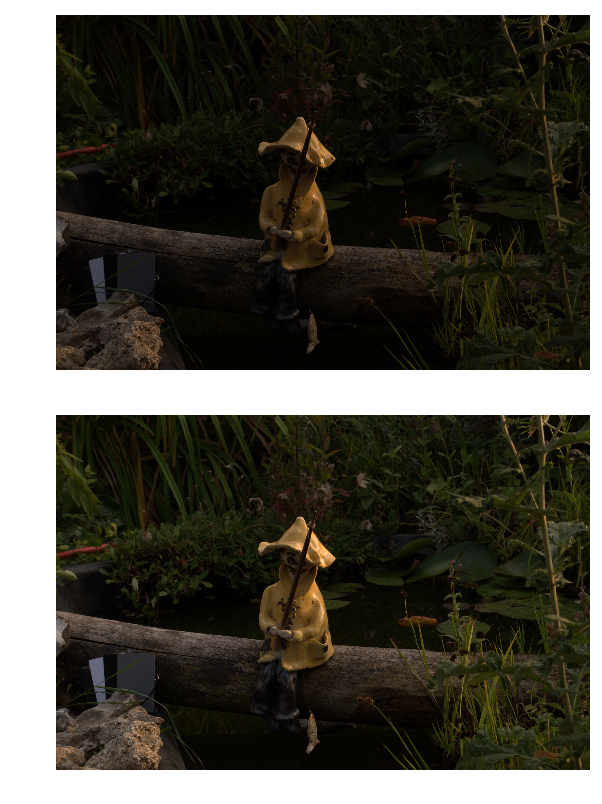

In [3]:
# Figure dimensions
fig_width = 6
fig_height = fig_width * img1.shape[0] / img1.shape[1]

# Display figure (JPG images)
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(fig_width, 2 * fig_height)
fig.dpi = 102
_ = axs[0].imshow(img1)
_ = axs[1].imshow(img2)
fig.tight_layout()
for ax in axs:
    ax.axis('off')
plt.show()

## Comparison of images

In [4]:
# Prepare data for scatter plot
x1 = img1.flatten()
x2 = img2.flatten()

# Compute median x2 for each x1
x2_median = np.zeros(256)
for i in np.arange(256):
    n = np.size(x1[x1 == i])
    if n > 10:
        x2_median[i] = np.median(x2[x1 == i])
    else:
        x2_median[i] = np.nan


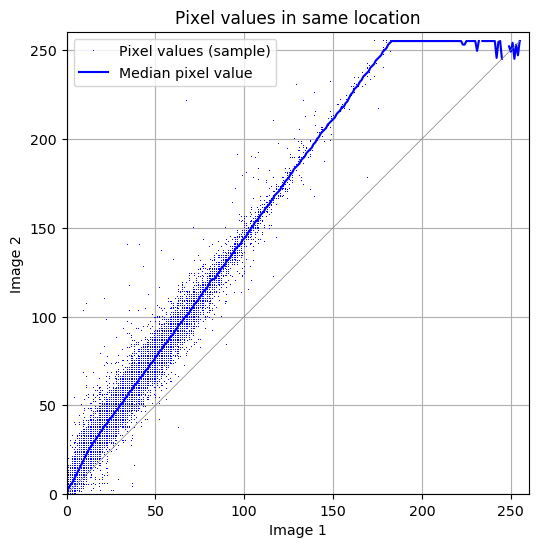

In [5]:
# Random sample of data points to display
n = np.size(x1)
idx = np.random.randint(0, high=n, size=100000)

# Figure dimensions
fig_width = 6
fig_height = fig_width * img1.shape[0] / img1.shape[1]

# Display figure
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(fig_width, fig_width)
fig.dpi = 102

line1, = ax.plot(x1[idx], x2[idx])
line1.set_marker(',')
line1.set_markeredgecolor('blue')
line1.set_markerfacecolor('blue')
line1.set_markersize(2)
line1.set_linestyle('None')
line1.set_label('Pixel values (sample)')

line2, = ax.plot(np.arange(256), x2_median)
line2.set_marker('None')
line2.set_linestyle('solid')
line2.set_color("blue")
line2.set_label('Median pixel value')

line3, = ax.plot([0, 255], [0, 255])
line3.set_marker('None')
line3.set_linestyle('solid')
line3.set_linewidth(0.5)
line3.set_color("grey")

ax.set_xlabel('Image 1')
ax.set_ylabel('Image 2')
ax.set_title('Pixel values in same location')
ax.set_xlim([0, 260])
ax.set_ylim([0, 260])
ax.legend()
ax.grid(b=True)
ax.set_aspect('equal')

plt.show()

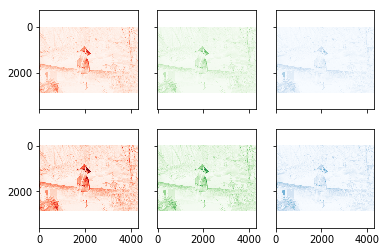

In [6]:
# Display figure: RGB layers
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
_ = ax[0, 0].imshow(img1[:, :, 0], cmap='Reds')
_ = ax[0, 1].imshow(img1[:, :, 1], cmap='Greens')
_ = ax[0, 2].imshow(img1[:, :, 2], cmap='Blues')
_ = ax[1, 0].imshow(img2[:, :, 0], cmap='Reds')
_ = ax[1, 1].imshow(img2[:, :, 1], cmap='Greens')
_ = ax[1, 2].imshow(img2[:, :, 2], cmap='Blues')

plt.show()

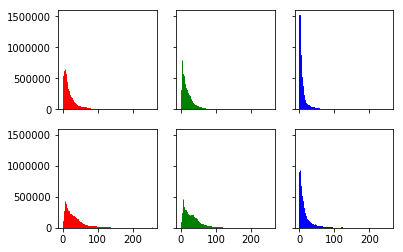

In [7]:
# Plot histogram
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
_ = ax[0, 0].hist(img1[:, :, 0].ravel(), bins=256, range=(0, 255), fc='r', ec='r')
_ = ax[0, 1].hist(img1[:, :, 1].ravel(), bins=256, range=(0, 255), fc='g', ec='g')
_ = ax[0, 2].hist(img1[:, :, 2].ravel(), bins=256, range=(0, 255), fc='b', ec='b')
_ = ax[1, 0].hist(img2[:, :, 0].ravel(), bins=256, range=(0, 255), fc='r', ec='r')
_ = ax[1, 1].hist(img2[:, :, 1].ravel(), bins=256, range=(0, 255), fc='g', ec='g')
_ = ax[1, 2].hist(img2[:, :, 2].ravel(), bins=256, range=(0, 255), fc='b', ec='b')

# Display
plt.show()

## Difference between images (non-negative)

In [8]:
# Difference between images (non-negative)
img12 = img1 - img2
img12[img1 < img2] = 0

img21 = img2 - img1
img21[img2 < img1] = 0

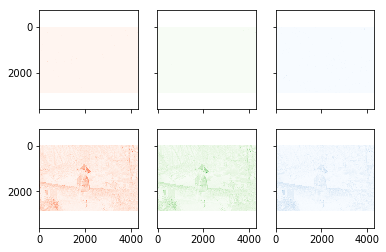

In [9]:
# Display figure: RGB layers
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
_ = ax[0, 0].imshow(img12[:, :, 0], cmap='Reds')
_ = ax[0, 1].imshow(img12[:, :, 1], cmap='Greens')
_ = ax[0, 2].imshow(img12[:, :, 2], cmap='Blues')
_ = ax[1, 0].imshow(img21[:, :, 0], cmap='Reds')
_ = ax[1, 1].imshow(img21[:, :, 1], cmap='Greens')
_ = ax[1, 2].imshow(img21[:, :, 2], cmap='Blues')

plt.show()

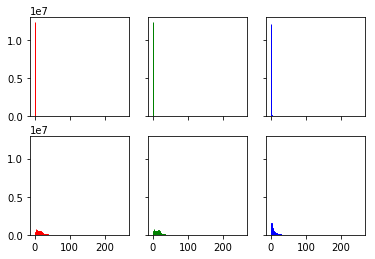

In [10]:
# Plot histogram
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
_ = ax[0, 0].hist(img12[:, :, 0].ravel(), bins=256, range=(0, 255), fc='r', ec='r')
_ = ax[0, 1].hist(img12[:, :, 1].ravel(), bins=256, range=(0, 255), fc='g', ec='g')
_ = ax[0, 2].hist(img12[:, :, 2].ravel(), bins=256, range=(0, 255), fc='b', ec='b')
_ = ax[1, 0].hist(img21[:, :, 0].ravel(), bins=256, range=(0, 255), fc='r', ec='r')
_ = ax[1, 1].hist(img21[:, :, 1].ravel(), bins=256, range=(0, 255), fc='g', ec='g')
_ = ax[1, 2].hist(img21[:, :, 2].ravel(), bins=256, range=(0, 255), fc='b', ec='b')

# Display
plt.show()

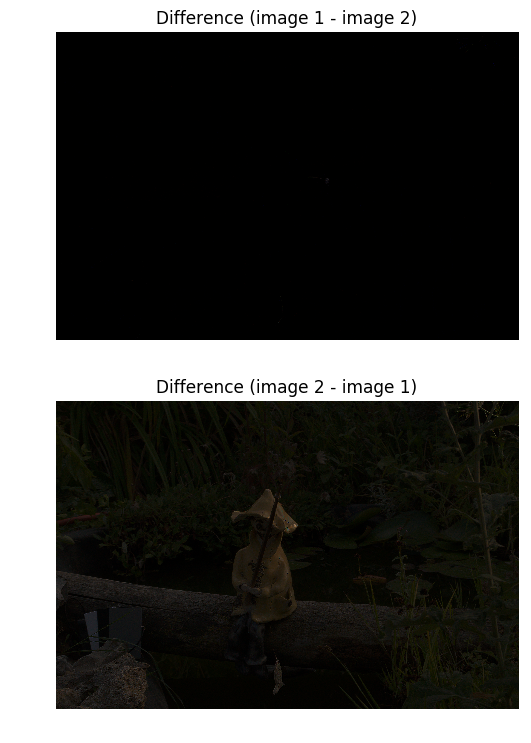

In [11]:
# Figure dimensions
fig_width = 6
fig_height = fig_width * img12.shape[0] / img12.shape[1]

# Display figure
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(fig_width, 2.2 * fig_height)
fig.dpi = 102
_ = axs[0].imshow(img12)
_ = axs[1].imshow(img21)
fig.tight_layout
axs[0].set_title("Difference (image 1 - image 2)")
axs[1].set_title("Difference (image 2 - image 1)")
for ax in axs:
    ax.axis('off')
plt.show()

In [12]:
# Add difference images
img3 = img12 + img21

# Save processed image
PIL.Image.fromarray(img3).save('Output/_dsc4836_dsc4837.jpg', quality=90, optimize=True)

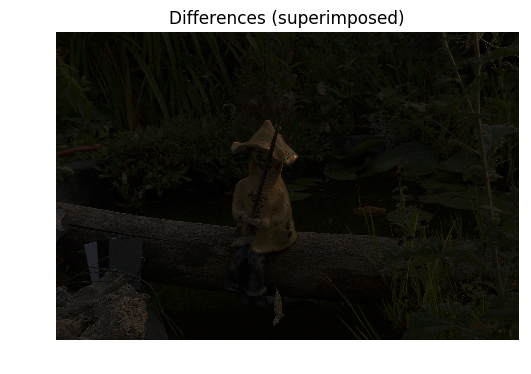

In [13]:
# Figure dimensions
fig_width = 6
fig_height = fig_width * img3.shape[0] / img3.shape[1]

# Display figure
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(fig_width, fig_height)
fig.dpi = 102
_ = ax.imshow(img3)
ax.set_title("Differences (superimposed)")
ax.axis('off')
plt.show()